# Dataset D1 - WGS E.coli


## Importing libraries

In [1]:
from __future__ import division
import pylab as pl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import math
import seaborn as sns
import os

## Data reading and cleaning

In [2]:
data = pd.read_csv('../summary_data/D1_WGS_E.coli_summary.csv')
data["Trim Effeciency"] = data["Base - TP TRIM"]/(data["Base - TP TRIM"] + data["Base - FP TRIM"])
data['total_corrections'] = data['Base - TP']+ data['Base - FP']

## Defining color dictionary

In [3]:
color_dict=dict({'Bfc':'purple','Bless':'orange','Coral':'brown','Fiona':'gray','Lighter':'pink','Musket':'blue','Pollux':'yellow','Racer':'green','Reckoner':'red','Sga':'black'})

## Selecting best kmer for each tool

In [4]:
data_best = data.loc[data.groupby(["Tool","Coverage"])["Base Gain"].idxmax()] 
data_best = data_best.fillna(0)

<br>
<br>

# Figure 2g

Heatmap depicting the gain across various coverage settings.<br>
Each row corresponds to an error correction tool, and each column corresponds to a dataset with a given coverage.
<br>For each tool, the best k-mer size was selected.

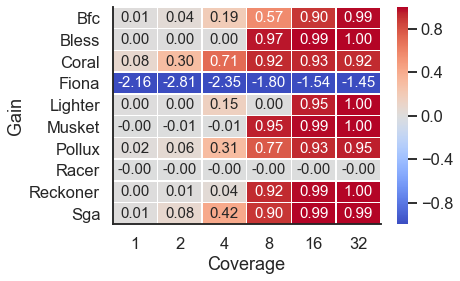

In [5]:
result = data_best.pivot(index='Tool', columns='Coverage', values='Base Gain') \
    .sort_values(by="Tool", ascending=False)

import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("talk")
g=sns.heatmap(result, 
              annot=True, 
              cmap='coolwarm',
              center=0,
              linewidths=.5,
              annot_kws={'size':15},
              fmt=".2f",
              vmin=-1, 
              vmax=1)


g.set(xlabel='Coverage', ylabel='Gain')
g.set_ylim(0, 10)
g=sns.despine()

plt.savefig("../figures/D1_WGS_E.coli/Fig2g_heatmap_ecoli_gain.png", bbox_inches="tight")
plt.savefig("../figures/D1_WGS_E.coli/Fig2g_heatmap_ecoli_gain.pdf",bbox_inches="tight")


<br>
<br>

# Figure 2h
Heatmap depicting the precision across various coverage settings. <br>
Each row corresponds to an error correction tool, and each column corresponds to a dataset with a given coverage.
<br>For each tool, the best k-mer size was selected.

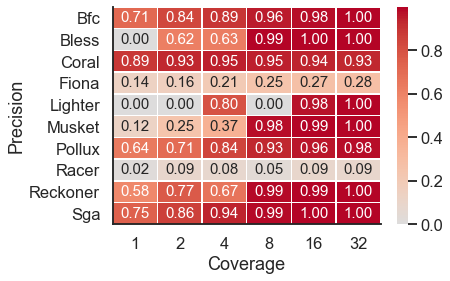

In [6]:
result = data_best.pivot(index='Tool', columns='Coverage', values='Base Precision') \
    .sort_values(by="Tool", ascending=False)

import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("talk")
g=sns.heatmap(result, 
              annot=True, 
              cmap='coolwarm',
              center=0,
              linewidths=.5,
              annot_kws={'size':15},
              fmt=".2f")

g.set(xlabel='Coverage', ylabel='Precision')
g.set_ylim(0, 10)
g=sns.despine()

plt.savefig("../figures/D1_WGS_E.coli/Fig2h_heatmap_ecoli_precision.png",bbox_inches="tight")
plt.savefig("../figures/D1_WGS_E.coli/Fig2h_heatmap_ecoli_precision.pdf",bbox_inches="tight")

<br>
<br>

# Figure 2i
Heatmap depicting the sensitivity across various coverage settings.<br> 
Each row corresponds to an error correction tool, and each column corresponds to a dataset with a given coverage.
<br>For each tool, the best k-mer size was selected.

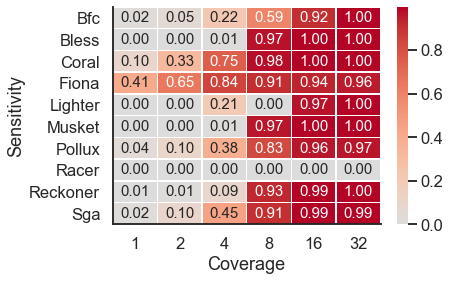

In [7]:
result = data_best.pivot(index='Tool', columns='Coverage', values='Base Sensitivity')\
    .sort_values(by="Tool", ascending=False)

import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("talk")
g=sns.heatmap(result, 
              annot=True, 
              cmap='coolwarm',
              center=0,
              linewidths=.5,
              annot_kws={'size':15},
              fmt=".2f")

g.set(xlabel='Coverage', ylabel='Sensitivity')
g.set_ylim(0, 10)
g=sns.despine()

plt.savefig("../figures/D1_WGS_E.coli/Fig2i_heatmap_ecoli_sensitivity.png",bbox_inches="tight")
plt.savefig("../figures/D1_WGS_E.coli/Fig2i_heatmap_ecoli_sensitivity.pdf",bbox_inches="tight")

<br>
<br>

# Figure 2j
Scatter plot depicting the number of TP corrections (x-axis) and FP corrections (y-axis) for datasets with 32x coverage. 
<br>For each tool, the best k-mer size was selected.

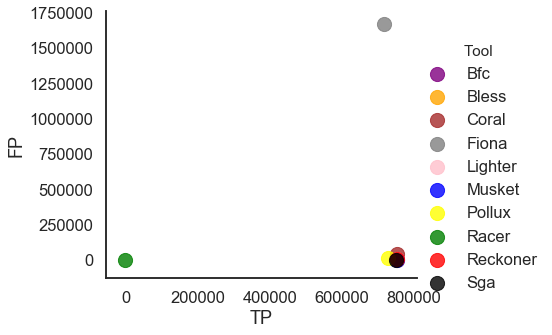

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("talk")
g=sns.lmplot(data=data_best[(data_best['Coverage'] == 32)]
             , x='Base - TP', 
             y='Base - FP', 
             hue='Tool',
             fit_reg=False,
             aspect=1.3,
             scatter_kws={"s": 200},
             palette=color_dict)

g.set(xlabel='TP', ylabel='FP')

g=sns.despine()
plt.savefig("../figures/D1_WGS_E.coli/Fig2j_TP_vs_FP.png")
plt.savefig("../figures/D1_WGS_E.coli/Fig2j_TP_vs_FP.pdf")

<br>
<br>

# Figure 2k
Scatter plot depicting the number of FP corrections (x-axis) and FN corrections (y-axis) for datasets with 32x
coverage. 
<br>For each tool, the best k-mer size was selected.

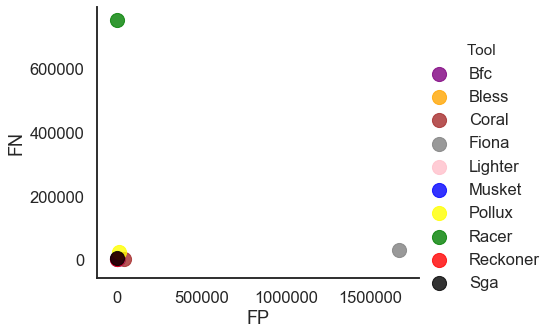

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("talk")
g=sns.lmplot(data=data_best[(data_best['Coverage'] == 32)], 
             x='Base - FP', 
             y='Base - FN', 
             hue='Tool',
             fit_reg=False,
             aspect=1.3,
             scatter_kws={"s": 200},
             palette=color_dict)

g.set(xlabel='FP', ylabel='FN')

g=sns.despine()

plt.savefig("../figures/D1_WGS_E.coli/Fig2k_FP_vs_FN.png")
plt.savefig("../figures/D1_WGS_E.coli/Fig2k_FP_vs_FN.pdf")

<br>
<br>

# Figure 2l
Scatter plot depicting the sensitivity (x-axis) and precision (y-axis) for datasets with 32x coverage. 
<br>For each tool, the best k-mer size was selected.


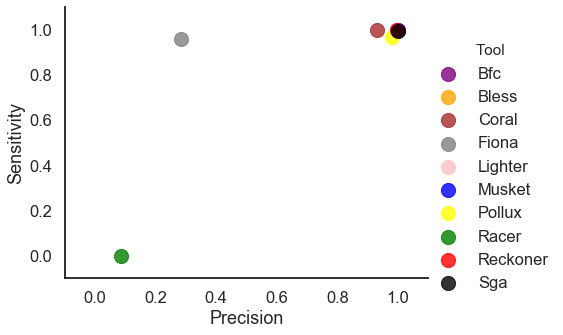

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("talk")
g=sns.lmplot(data=data_best[(data_best['Coverage'] == 32)], 
             x='Base Precision', 
             y='Base Sensitivity', 
             hue='Tool',
             fit_reg=False,
             aspect=1.3,
             scatter_kws={"s": 200},
             palette=color_dict)

g.set(xlabel='Precision', ylabel='Sensitivity')

plt.ylim(-0.1, 1.1)
plt.xlim(-0.1, 1.1)
g=sns.despine()
plt.savefig("../figures/D1_WGS_E.coli/Fig2l_Precision_vs_Sensitivity.png")
plt.savefig("../figures/D1_WGS_E.coli/Fig2l_Precision_vs_Sensitivity.pdf")
